In [1]:
import numpy as np
import MRzeroCore as mr0
import pypulseq as pp
import matplotlib.pyplot as plt

simulate (2D) 
SPEN_SE_31-Jul-2025.seq
VoxelGridPhantom
size = tensor([0.2000, 0.2000, 0.0080])
Plotting slice 1 / 2


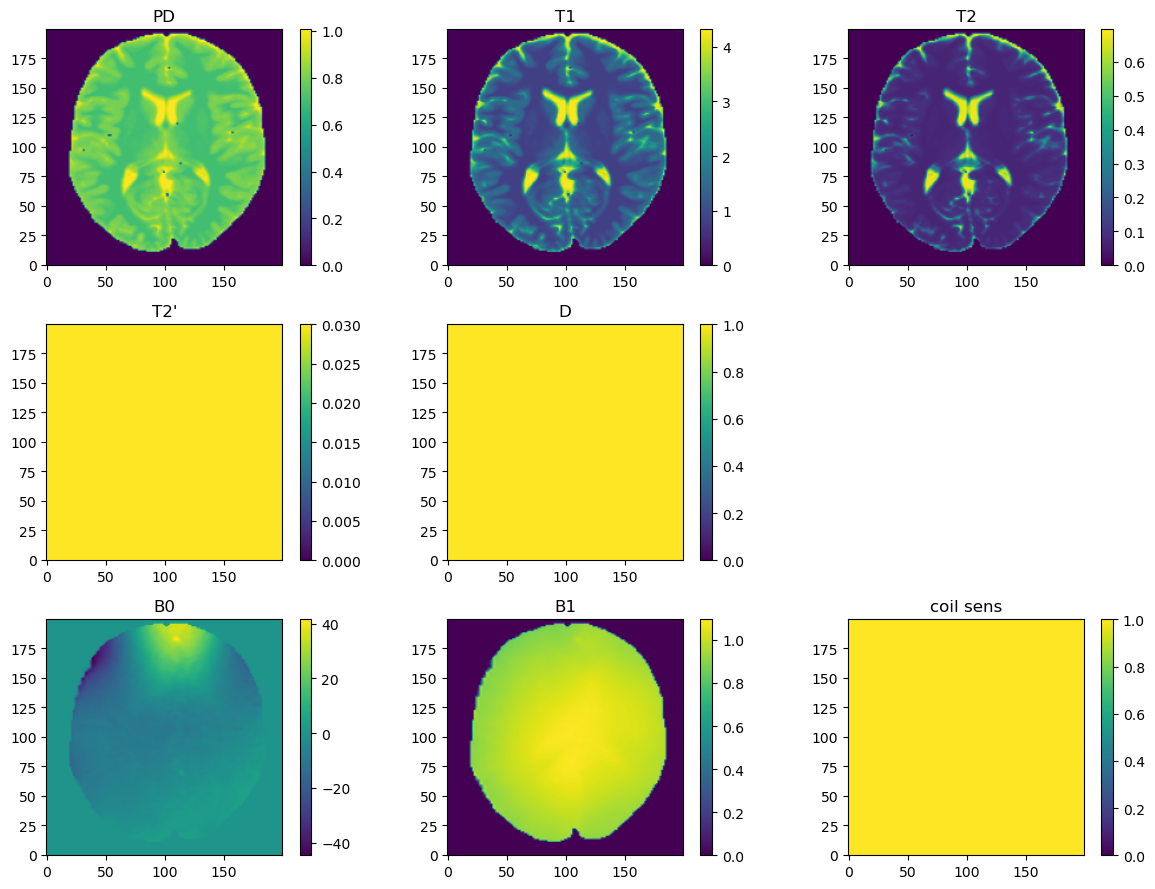

In [28]:
# %% SETUP
# Define the sequence and phantom
seq = pp.Sequence()
seq_file = "SPEN_SE_31-Jul-2025.seq"
seq.read(seq_file)

print('simulate (2D) \n' + seq_file)
# exact_trajectories are only important for diffusion weighted sequences
seq0 = mr0.Sequence.import_file(seq_file)
# Simulate the sequence

sz = [100, 100]
obj_p = mr0.VoxelGridPhantom.load_mat('numerical_brain_cropped.mat')
obj_p = obj_p.interpolate(2*sz[0], 2*sz[1], 2*1)
obj_p.plot()
# Convert Phantom into simulation data
obj_p = obj_p.build()



Calculating repetition 200 / 200 - done


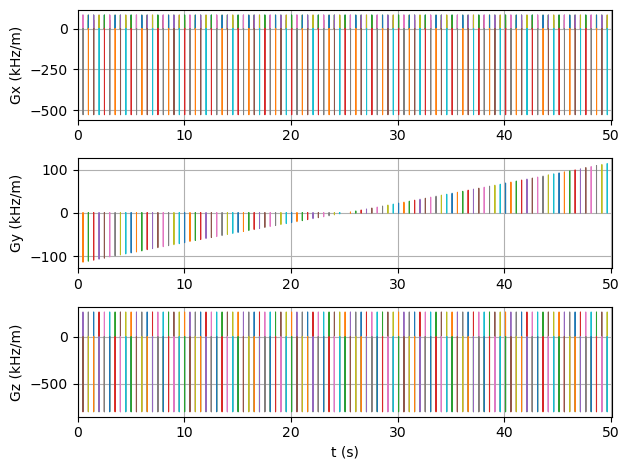

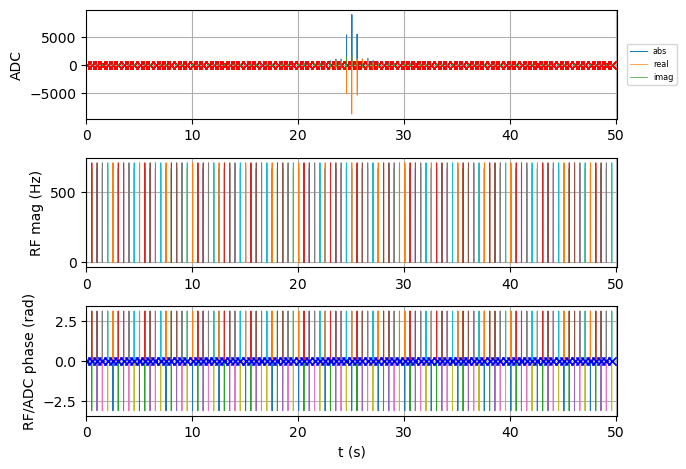

In [30]:
# seq0.plot_kspace_trajectory()
# Simulate the sequence
graph = mr0.compute_graph(seq0, obj_p, 200, 1e-3)
signal = mr0.execute_graph(graph, seq0, obj_p, print_progress=True)

# PLOT sequence with SIGNAL
seq.plot(plot_now=False)
mr0.util.insert_signal_plot(seq=seq, signal =signal.numpy())
plt.show()

reconstruct and plot


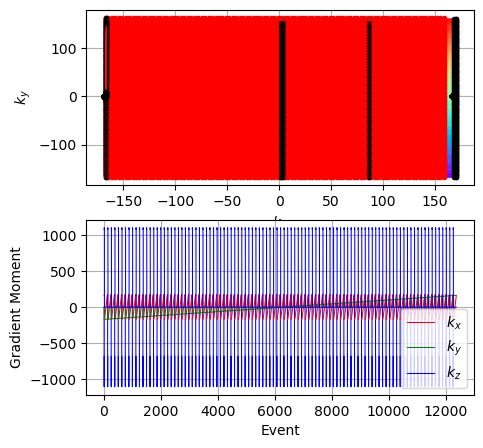

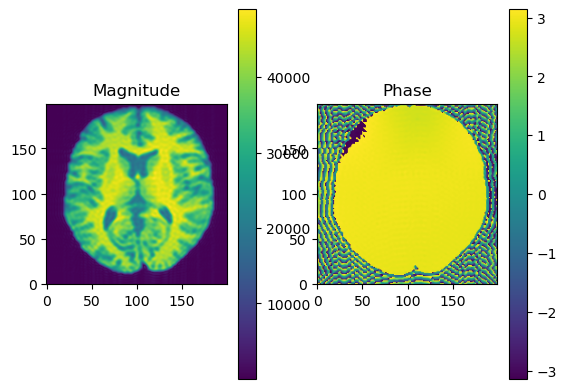

In [ ]:
# Unfortunately, we need to limit the resolution as reco_adjoint is very RAM-hungy
print('reconstruct and plot')
seq0.plot_kspace_trajectory()

reco = mr0.reco_adjoint(signal, seq0.get_kspace(), resolution=(200, 200, 1), FOV=(0.3, 0.3, 5))
plt.figure()
plt.subplot(121)
plt.title("Magnitude")
plt.imshow(reco[:, :, 0].T.abs(), origin="lower")
plt.colorbar()
plt.subplot(122)
plt.title("Phase")
plt.imshow(reco[:, :, 0].T.angle(), origin="lower", vmin=-np.pi, vmax=np.pi)
plt.colorbar()
plt.show()

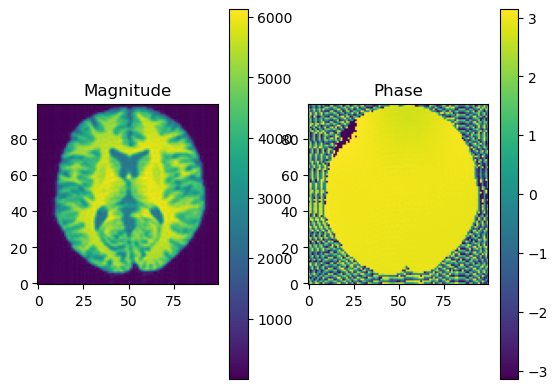